![image](https://www.linkpicture.com/q/nyplogo.jpg)

Welcome to the lab! Before we get started here are a few pointers on Jupyter notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.

# Lab 1 (solution) : Car Model Classification with CNN
In this lab we will try to build a Vehicle Classifier to classify three different models of the car. We will collect 3 groups of images namely  Honda Civic, Toyota Altis and Volkswagen Passat to be our dataset. The  collected dataset will be used to train the Resnet50 CNN(Convolution Neural Network). Upon completion of the training, we will be able to classify an unknown image to give a prediction of the model of the car.  


We will build the car model classifier based on the following steps

1.   Select the python virtual environment   
2.   Import the libraries needed for the program
3.  Prepare the data
4.   Prepare the CNN model
5.  Train the model with the training set and evaluate its performance
6.   Use the trained model to classify input data



# 1. Select the python virtual environment

At the upper right corner of the jupyter notebook, select the pre-installed python virtual environment.
Look for python virtual environment with the name tf1env. Select this for our lab exercise. 
 
 
 ![image](https://www.linkpicture.com/q/tf1env.jpg)


# 2. Import the libraries needed for the program
We will begin by importing the libraries that we need, mainly Keras.  
Keras is based on a minimal framework that provides a simpler way to create deep learning models based on TensorFlow.
Keras contains useful functions for pre-preprocessing of image data and definition of convolution neural network.
Matplotlib is used for data visualization. 



In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.resnet50 import ResNet50
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import keras
import tensorflow as tf

Using TensorFlow backend.
E:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
print(tf.__version__)

1.13.1


# 3. Prepare the data

Usually in ML, we divide our data into 3 different sets

- Training Data: Collection of sample data used to train the neural network.

- Validation Data: Collection of sample data used to provide an unbiased evaluation of neural netowork during the training.

- Test Data: Collection of sample data used to evaluate the trained neural network.

### 3.1 Collect data for training and validation

We have pre-collected data that are stored in the following directory structure.

For train data, it store in the path ./dataset/Lab1dataset/data/train.
```
./dataset/Lab1dataset/data/train
                           |- Honda
                           |- Toyota
                           |- Volkswagen 

```
Each of the above sub-directories(Honda, Toyota, Volkawagen) is stored with
60 different jpg images.


For validation data, it store in the path ./dataset/Lab1dataset/data/validation.
```
./dataset/Lab1dataset/data/validation.
                               |- Honda
                               |- Toyota
                               |- Volkswagen 
```
Each of the above sub-directories(Honda, Toyota, Volkawagen) is stored with
15 different jpg images.


For test data, it store in the path /dataset/Lab1dataset/prediction_images
```
./dataset/lab1dataset/
    |- prediction_images

```
A few test images are stored in the above test directory.


Start the terminal. Use the follow command to copy the dataset for the lab
```
cp -rf dataset ~/git/mindef-ai/day2-am
```

![image](https://www.linkpicture.com/q/terminal.jpg)


We will define the following variables for the different data path.

It will be easier for us to reference these paths in other sections of the code.


In [3]:
# Define train data paths, validation data path and test data path 
data_dir_path='./dataset/Lab1dataset/data/'
train_data_dir = data_dir_path+'train/'
validation_data_dir = data_dir_path+'validation/'
prediction_data_dir = './dataset/Lab1dataset/prediction_images/'

### Exercise
Let explore the images we had collected for the train dataset.

Display the following images from the train data.

* image 1 ( train_data_dir+"Honda/100.jpg")
* image 2 (  train_data_dir+"Toyota/Altis.jpg")

What do you notice about the size of each of the image?
Read the printed image size (width, height, color).

*color(1-greysacle, 3-color)

Why are we interested in the image size?

<details><summary>Click here for answer</summary> 
<br/>
    
The Convolution Neural Network(CNN) has a fixed data input size. Therefore we need to pre-process the collected images to the same size as the CNN input before we can do training.
    
<br/>
</details>

(1413, 2700, 3)


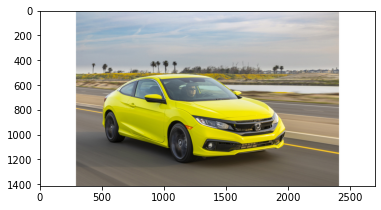

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# TODO: complete the code below
#image 1
img = mpimg.imread(train_data_dir+"Honda/100.jpg")
print(img.shape)
imgplot = plt.imshow(img)


    

(2480, 2480, 3)


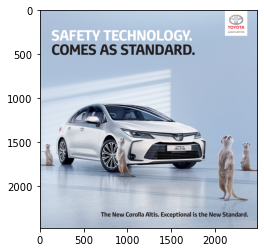

In [5]:
# TODO: complete the code below
#image 2
img = mpimg.imread( train_data_dir+"Toyota/Altis.jpg")
print(img.shape)
imgplot = plt.imshow(img)

### 3.2 Prepare Data for training and validation

From the previous exercise, we noticed that the collected data need to be pre-processed before we can use it to train our CNN. In this section, we will look at some of the methods that can help us to do data pre-processing.

Data augmentation is a strategy that enables developer to significantly increase the diversity of data available through data pre-processing.

Data augmentation techniques such as resizing, rotation, and cropping are commonly used to train large neural networks.


![image](https://www.linkpicture.com/q/Augmentation.png)

Kera provides us a function to do data augmentation. We can configure the parameters in the function to achieve the required image pre-processing. We will do some of the parameters configuration in the exercise.
 



### Exercise
We will configure the image augmentation parameters in the Keras ImageDataGenerator() function for the train and validation data.

Here are some for the parameters.

- rescale factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided. Most of the time we rescale based on the greyscale eg. 1./255

- shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees) eg. 0.2 degrees

- zoom_range: Float. zoom range for width and height. eg. 0.2

- horizontal_flip: Boolean. Randomly flip inputs horizontally.eg. True

- add the configuration value in the area #add code 


After complete the data argumentation parameters, observe the paremeter *target_size* in the function train_datagen.flow_from_directory() and validation_datagen.flow_from_directory.

Which of the target_size should we choose for the data pre-processing?
<details><summary>Click here for answer</summary> 
<br/>
As mentioned previously, Convolution Neural Network(CNN) has a fixed data input size. Therefore we need to set the target_size to be the same as the CNN input size for the pre-processing. We are not able to know the size until we have setup the ResNet50 CNN input.
    
<br/>
</details>


We will put the above pre-processing steps for train and validation inside the function name PrepData().


In [12]:
#Prepare Data for training and validation

def PrepareData(img_width,img_height,batch_size ):

    # This augments the data. This is usefull when working with a small sample size
    # TODO: complete the code below
    train_datagen = ImageDataGenerator(
        rescale= 1./255,
        shear_range= 0.2,
        zoom_range= 0.2,
        horizontal_flip= True)
    
    # TODO: complete the code below
    validation_datagen = ImageDataGenerator(rescale=1./255)

    print("train generator")
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    print("validation generator")
    validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

    return train_generator,validation_generator

### 3.3 Get the total number of predicted classes/labels

The label of the training samples are determined by the subdirectory name, e.g.In the train sub-directories, Honda is the label to tag to all the images collected for that group.

In our case, the number of predicted classes are based on the numbers of sub-directories in the train folder.


### Exercise
We are going to find the number of classes and the labels for our collected data.

Where can we get the information for the number of classes and the Label names?
Look for the directory where we stored our train data. Complete the following code. 

Observe the number of classes printed at the output. Why we need to determine the number of classes?
<details><summary>Click here for answer</summary> 
<br/>
    
The Convolution Neural Network(CNN) has a fixed data input size and output size. We have pre-processed our data for CNN input,next we need to handle the CNN output. 

The number of classes is to allow the CNN to predict the number of outputs.
    
<br/>
</details>





In [15]:
# Gets the total no. of classes and labels

# TODO: complete the code below
classes = ImageDataGenerator().flow_from_directory(train_data_dir).class_indices
print(classes)
print("number of classes="+ str(len(classes)))
num_classes = len(classes)

Found 183 images belonging to 3 classes.
{'Honda': 0, 'Toyota': 1, 'Volkswagen': 2}
number of classes=3


# 4. Prepare the CNN Model

### 4.1 CNN Convolution Netural Network


![image](https://www.linkpicture.com/q/resnet50.png)

There are many CNN implementation, such as LeNet, AlexNet, VGG, GoogLeNet, ResNet and more.

In this lab we will be using ResNet50 CNN.

The ResNet50 is built from the different combination of the following layers
        *   Conv2D-> number of feature maps, feature map size (width x height)
        *   Activation function -> relu , sigmoid 
        *   MaxPooling-> kernel size (width x height)

together with the output layers

        *   Flatten-> 2D to 1D
        *   Dense layer->number of neutrons
        *   Activation Function->softmax(probability of each the classes)



### Execrise
We have a brief understanding of how the ResNet50 layers are formed. In this exercise, we will customised our ResNet50 to train our pre-process dataset.

Set the ResNet50 input size.
- In the following code, goto function ResNet50() set the parameters input_size to (width,height,color)->(197,197,3)

Recall in the earlier exercise, we have 3 different classes of images. We need our CNN to be able to predict these 3 classes. What do you think how many output neurons of the last Dense layer should have? 

- In the following codes, change the dense layer numbers of neurons according to the number of classes. 

Run the function compileModel() to build the custom ResNet50.

Observe the print out of the customise ResNet50. Look for the input size. What is input size?

<details><summary>Click here for answer</summary> 
<br/>
    
We have fixed our customise ResNet50 with the input size (197,197,3), this will be the size we need to set for the pre-processing of our data.

    
<br/>
</details>



In [16]:
def compileModel():
    print("compiling model")
    learning_rate=1e-4

     ## TODO: Add in the input size
    conv_base = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape=(197, 197, 3))

    model = models.Sequential()
    model.add(conv_base)
    #Add dense and classification layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.1))
    
    ## TODO: Change the Dense layer to have the correct number of classes 
    model.add(layers.Dense(num_classes, activation='softmax'))

    print(conv_base.summary())
    print(model.summary())
 
    model.compile(loss='categorical_crossentropy',optimizer= optimizers.adam(lr=learning_rate),metrics=['accuracy'])
    for layer in conv_base.layers:
      layer.trainable = False
    for layer in conv_base.layers[-4:]:
      layer.trainable = True
    return model

In [17]:
compileModel()

compiling model
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 197, 197, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 203, 203, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 99, 99, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_co

The ResNet50 CNN will go through many iterations during training. We will set a checkpoint to save the best-trained model during the training iterations.

In [18]:
best_model = keras.callbacks.ModelCheckpoint(data_dir_path+'custom_w_supervision_try2_best' + '.h5', monitor='val_acc',save_best_only=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.25, patience=5,min_lr=0.000005)


# 5. Train the model with the training set and evaluate it performance

### 5.1 Train and validate the model


![image](https://www.linkpicture.com/q/training.png)

With the preprocessed training and validation dataset. We can input them into the our defined model for training.
As part of the training, we will also need to set some parameter values in the training function (the ``fit()``)

- Set the number of epoch to  indicates the number of passes of the entire training dataset the model has to complete.

- When we have a huge data set it not possible to load the entire data to run one epoch of training. Setting Step per epoch allow huge data to divide into batches to complete entire training.

We save the final training iteration weights into to a binary data format(.h5).

In [19]:
def trainModel(train_data, validation_data,model):

    print("starting training.... ")
    hist = model.fit_generator(
        (train_data),
        steps_per_epoch=nb_train_samples // batch_size, # The accumulated amount of steps
        epochs=epochs,
        validation_data=validation_data,
        nb_val_samples=nb_validation_samples,
        callbacks=[best_model, reduce_lr]
    )

    plotVal_plotLoss(hist)
    model.save_weights(data_dir_path+'custom_w_supervision_try2.h5') # Saving the compile weights

This following function plotVal_plotLoss() is to plot the accuracy and loss result of the model during the training.
 
- Loss is a number that indicates the difference between the model's prediction output with the ground truth. 

- Accuracy is a metric that can be applied to classification tasks only. It describes just what percentage of your train/test data are classified correctly.


In [20]:
# This function generates graphs of the loss and the accuracy of the model
def plotVal_plotLoss (model) :

    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()

    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()


### Exercise

Now we are ready to start the training

Define the image size for the dataset and batch size for the PrepareData() function

```
img_width, img_height = 197, 197
batch_size = # The batch size represents the total amount of images that are included in each iteration.
```
Why is the pre-process image size is 197,197? 
<details><summary>Click here for answer</summary> 
<br/>
    
We have fixed our customise ResNet50 with the input size (197,197,3), this will be the size we need to set for the pre-processing of our data.

<br/>
</details>

    
     
Define the total amount of samples for the training and validation set.

In the previous step we have copied the dataset for the lab, we have mentioned the amount of data that are stored in the dataset.
```
nb_train_samples = #add code
nb_validation_samples =#add code
```

Set the number of epoch(iterations) to conduct the training
```
epochs = #add code

```
You can varies the epochs to observe the model accuracy and loss values.

What do you notice when epochs are varied?
<details><summary>Click here for answer</summary> 
<br/>
Typically the increase in the epochs will reduce the loss and improve the prediction accuracy.    

<br/>
</details>


train generator
Found 183 images belonging to 3 classes.
validation generator
Found 46 images belonging to 3 classes.
compiling model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 197, 197, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 203, 203, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 99, 99, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 99, 99, 64)   256         conv1[0][

/home/ubuntu/anaconda3/envs/tf1env/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/envs/tf1env/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=6, epochs=5, validation_data=<keras.pre..., callbacks=[<keras.ca..., validation_steps=45)`
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/envs/tf1env/lib/python3.7/site-packages/keras/engine/training.py:975: UserWarni

Epoch 1/5
6/6 [==============================] - 26s 4s/step - loss: 1.1183 - acc: 0.3816 - val_loss: 0.9372 - val_acc: 0.5451
Epoch 2/5
6/6 [==============================] - 10s 2s/step - loss: 0.6298 - acc: 0.7350 - val_loss: 0.9208 - val_acc: 0.6056
Epoch 3/5
6/6 [==============================] - 10s 2s/step - loss: 0.3301 - acc: 0.9056 - val_loss: 0.6746 - val_acc: 0.7821
Epoch 4/5
6/6 [==============================] - 9s 2s/step - loss: 0.2363 - acc: 0.9601 - val_loss: 1.1156 - val_acc: 0.6536
Epoch 5/5
6/6 [==============================] - 9s 2s/step - loss: 0.2009 - acc: 0.9344 - val_loss: 0.6903 - val_acc: 0.7159


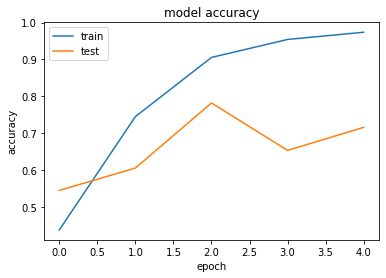

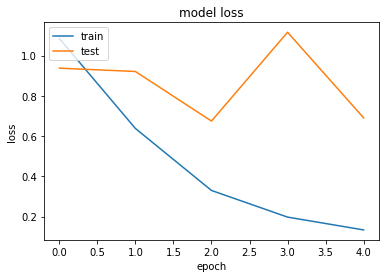

In [21]:
# dimensions of our images.
## TODO: Set the image width and height 
img_width, img_height = 197, 197

# The batch size represents the total amount of pictures that are included in each iteration.
## TODO: Set the batch size
batch_size = 30

#Prepare data
train_data, validation_data = PrepareData(img_width,img_height,batch_size)

#Load Model
model=model=compileModel()

# Defining the total amount of samples in both the training and validation set
## TODO: Set the total nunmber of train images and total number of validation images
nb_train_samples =180
nb_validation_samples =45

## TODO: Set the number to training iterations
epochs = 5

#Start the training model
trainModel(train_data, validation_data, model)



# 6. Use the trained model to classify input data



### 6.1 Setup a predict image function

After completed the training for the customised ResNet50 CNN. We will pass it into the following predictImg() function to predict the output given an unkown input image.


In [22]:
# This function c
def predictImg(path,img_width,img_height ,model):
    imagep = image.load_img(path, target_size=(img_width, img_height))
    x = image.img_to_array(imagep)
    x = x / 255  # Insures that images are normalized, so it can be compared test on a model that also used normalized training and validation images

    x = np.expand_dims(x, axis=0) # flattens the image
    prediction = model.predict(x) # Extract the prediction made by the model
    print(path)
    print(prediction)
    findLabel(prediction, 0.2, path)


In [23]:
def findLabel(test, threshold, path):
    if (max(test[0]) < threshold):
        print("no class could be defined for " + path + " with threshold 0.85")
    else:
        m = max(test[0])
        index = [i for i, j in enumerate(list(test[0])) if j == m]
        #labeler(index[0], path)
        label = list(classes.keys())[index[0]]
        print("The image '" + path + "' belongs to class: " + label) # Prints the prediction


### Exercise

Now we are ready to use the trained model to predict the image.

Load our Resnet50 CNN model with the trained weights. The trained weights are stored in the .h5 file.

- In the compileModel() function we customised our ResNet50 CNN, we have defined a checkpoint to save the best-trained model. Load this best-trained file(.h5) into the customised ResNet50 CNN by setting the files(.h5) path and name into the model.load_weights() function. What is the best-trained file name?
<details><summary>Click here for answer</summary> 
<br/>
data_dir_path+'custom_w_supervision_try2_best.h5'
<br/>
</details>


Set the unknown images path and name together with the image width and height into the predictImg() function.

- Unknow image path and file name
<details><summary>Click here for answer</summary> 
<br/>
    eg.    prediction_data_dir+"honda1.jpg"
<br/>
</details>

- What is the width and height to resize the image?
<details><summary>Click here for answer</summary> 
<br/>
The image width and height has to follow the input size of the customised ResNet50. So it should be (197,197).
<br/>
</details>


Try to load different test images from the directory prediction_images to predict the output. You can check the predicted label against the test image file name. The test image file name is the ground truth label.


In [24]:

np.set_printoptions(suppress=True, precision=3)

model = compileModel()

## TODO: Set the best-trained weigth path and file name 
model.load_weights(data_dir_path+'custom_w_supervision_try2_best.h5')

## TODO: Set the unkown image path and file name
## TODO: Set the unkown image width and height

predictImg(prediction_data_dir+"honda1.jpg",197,197 , model) # 


compiling model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 197, 197, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 203, 203, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 99, 99, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 99, 99, 64)   256         conv1[0][0]                      
_____________________________________________________________________________________________